## Compare Deaths in various US cities

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
#import covid.csv file
covid = pd.read_csv('../data/covid.csv')
covid.tail()

,City,Deaths per 100000,Deaths/1000,Deaths
37,"Rochester, NY",NaN,NaN,NaN
38,"St. Louis, MO",131.0,1.31,1838.0
39,"St. Paul, MN",NaN,NaN,NaN
40,"San Francisco, CA",39.0,0.39,346.0
41,Total,142.0,1.42,65846.0


In [3]:
#drop rows with nulll values
covid = covid.dropna()
covid.head()

,City,Deaths per 100000,Deaths/1000,Deaths
3,"Baltimore, MD",141.0,1.41,837.0
5,"Boston, MA",199.0,1.99,1603.0
8,"Chicago, IL",175.0,1.75,9024.0
10,"Cleveland, OH",99.0,0.99,1226.0
19,"Los Angeles, CA",179.0,1.79,18044.0


In [4]:
#drop column
covid = covid.drop(columns=['Deaths per 100000','Deaths/1000'])

#rename column
covid=covid.rename(columns = {'Deaths':'COVID-19'})
covid.tail()

,City,COVID-19
32,"Philadelphia, PA",2971.0
33,"Pittsburgh, PA",1591.0
38,"St. Louis, MO",1838.0
40,"San Francisco, CA",346.0
41,Total,65846.0


In [5]:
#change to integer
covid['COVID-19'] = covid['COVID-19'].astype(int)
covid.head()

,City,COVID-19
3,"Baltimore, MD",837
5,"Boston, MA",1603
8,"Chicago, IL",9024
10,"Cleveland, OH",1226
19,"Los Angeles, CA",18044


In [6]:
#import spanish flu.csv file
spanish_flu = pd.read_csv('../data/spanish_flu.csv')
spanish_flu.tail()

,City,Population,9/14/1918,9/21/1918,9/28/1918,10/5/1918,10/12/1918,10/19/1918,10/26/1918,11/2/1918,...,1/25/1919,2/1/19191,2/8/1919,2/15/1919,2/22/1919,3/1/1919,3/8/1919,3/15/1919,Total,Deaths/1000
43,"Syracuse, NY",161404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,"Toledo, OH",262234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,"Washington, DC",401681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,"Worchester, MA",173650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Total,21115781.0,68.0,449.0,1453.0,4558.0,11386.0,19939.0,20806.0,14818.0,...,4199.0,3360.0,2586.0,2321.0,1971.0,2352.0,2274.0,2205.0,142631.0,6.754711


In [7]:
#drop rows with nulll values
spanish_flu = spanish_flu.dropna()
spanish_flu.head(10)

,City,Population,9/14/1918,9/21/1918,9/28/1918,10/5/1918,10/12/1918,10/19/1918,10/26/1918,11/2/1918,...,1/25/1919,2/1/19191,2/8/1919,2/15/1919,2/22/1919,3/1/1919,3/8/1919,3/15/1919,Total,Deaths/1000
3,"Baltimore, MD",599653.0,0.0,0.0,0.0,117.0,563.0,1357.0,1073.0,397.0,...,150.0,138.0,126.0,117.0,90.0,66.0,51.0,61.0,5007.0,8.349829
5,"Boston, MA",785245.0,46.0,265.0,775.0,1214.0,1027.0,589.0,226.0,137.0,...,153.0,110.0,89.0,71.0,0.0,70.0,69.0,45.0,6225.0,7.927462
8,"Chicago, IL",2596681.0,16.0,24.0,91.0,417.0,1047.0,2105.0,2367.0,1470.0,...,734.0,277.0,194.0,235.0,233.0,230.0,213.0,232.0,14014.0,5.396889
10,"Cleveland, OH",810306.0,0.0,0.0,0.0,18.0,40.0,158.0,453.0,682.0,...,92.0,108.0,100.0,80.0,0.0,94.0,131.0,132.0,4563.0,5.631206
19,"Los Angeles, CA",568495.0,0.0,0.0,0.0,0.0,69.0,131.0,293.0,382.0,...,177.0,104.0,47.0,21.0,8.0,14.0,8.0,13.0,3184.0,5.600753
25,"Nashville, TN",119215.0,0.0,0.0,0.0,0.0,129.0,193.0,127.0,54.0,...,21.0,17.0,15.0,16.0,23.0,19.0,18.0,11.0,913.0,7.658432
29,"New York, NY",3215879.0,0.0,106.0,191.0,733.0,2121.0,4227.0,5222.0,4402.0,...,1193.0,1212.0,893.0,786.0,788.0,904.0,747.0,695.0,33387.0,10.381920
32,"Philadelphia, PA",1761371.0,0.0,0.0,0.0,706.0,2635.0,4597.0,3021.0,1203.0,...,259.0,308.0,262.0,232.0,231.0,207.0,183.0,164.0,15785.0,8.961769
33,"Pittsburgh, PA",593303.0,0.0,17.0,34.0,69.0,114.0,389.0,576.0,630.0,...,145.0,174.0,145.0,163.0,137.0,134.0,116.0,118.0,5959.0,10.043772
38,"St. Louis, MO",779951.0,0.0,0.0,0.0,0.0,86.0,186.0,233.0,257.0,...,71.0,75.0,53.0,64.0,0.0,81.0,93.0,119.0,3691.0,4.732349


In [8]:
#only keep needed columns
spanish_flu = spanish_flu[['City', 'Total']].copy()

#rename columns
spanish_flu=spanish_flu.rename(columns = {'Total':'Spanish Flu'}).round(2)
spanish_flu.head(10)

,City,Spanish Flu
3,"Baltimore, MD",5007.0
5,"Boston, MA",6225.0
8,"Chicago, IL",14014.0
10,"Cleveland, OH",4563.0
19,"Los Angeles, CA",3184.0
25,"Nashville, TN",913.0
29,"New York, NY",33387.0
32,"Philadelphia, PA",15785.0
33,"Pittsburgh, PA",5959.0
38,"St. Louis, MO",3691.0


In [9]:
#change to integer
spanish_flu['Spanish Flu'] = spanish_flu['Spanish Flu'].astype(int)
spanish_flu.head()

,City,Spanish Flu
3,"Baltimore, MD",5007
5,"Boston, MA",6225
8,"Chicago, IL",14014
10,"Cleveland, OH",4563
19,"Los Angeles, CA",3184


In [15]:
#merge df's
flu_deaths2 = pd.merge(covid, spanish_flu, on = 'City', how = 'inner')
flu_deaths2.tail()

,City,COVID-19,Spanish Flu
7,"Philadelphia, PA",2971,15785
8,"Pittsburgh, PA",1591,5959
9,"St. Louis, MO",1838,3691
10,"San Francisco, CA",346,3755
11,Total,65846,142631


In [16]:
#flu_deaths = flu_deaths.drop(flu_deaths.index[[11]])
#flu_deaths.tail()

In [17]:
#data = df.reset_index().melt('date', var_name='a', value_name='b')
data = flu_deaths2.melt('City', var_name='a', value_name='b')
print (data)

                 City            a       b
0       Baltimore, MD     COVID-19     837
1          Boston, MA     COVID-19    1603
2         Chicago, IL     COVID-19    9024
3       Cleveland, OH     COVID-19    1226
4     Los Angeles, CA     COVID-19   18044
5       Nashville, TN     COVID-19     798
6        New York, NY     COVID-19   27568
7    Philadelphia, PA     COVID-19    2971
8      Pittsburgh, PA     COVID-19    1591
9       St. Louis, MO     COVID-19    1838
10  San Francisco, CA     COVID-19     346
11              Total     COVID-19   65846
12      Baltimore, MD  Spanish Flu    5007
13         Boston, MA  Spanish Flu    6225
14        Chicago, IL  Spanish Flu   14014
15      Cleveland, OH  Spanish Flu    4563
16    Los Angeles, CA  Spanish Flu    3184
17      Nashville, TN  Spanish Flu     913
18       New York, NY  Spanish Flu   33387
19   Philadelphia, PA  Spanish Flu   15785
20     Pittsburgh, PA  Spanish Flu    5959
21      St. Louis, MO  Spanish Flu    3691
22  San Fra

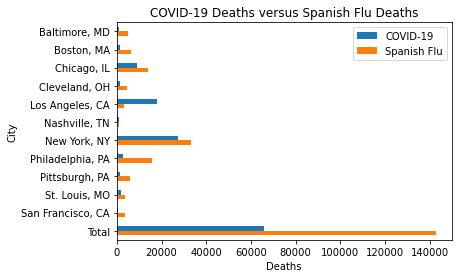

In [18]:
flu_deaths2.set_index('City').plot.barh()
plt.title('COVID-19 Deaths versus Spanish Flu Deaths')
plt.xlabel('Deaths')
#plt.xlim(0, 11.5)
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.legend(loc = 'upper right')
plt.savefig('flu_deaths2');